## 맷플롯립을 활용한 기상정보 데이터 분석

In [10]:
# 한글 폰트 설치 및 적용
# fc-cache: succeeded 확인 후 [런타임 다시 시작] 할 것.
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 11 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [30]:
1#판단스 관련 라이브러리 가져오기
import pandas as pd

4#데이터를 데이터프레임 형태로 읽어오기
df = pd.read_csv('부산 기온.csv', encoding='cp949')
df.head()    # 기본 위에서 5줄만 보여준다.

지점 지점명          일시  평균기온(°C)  최저기온(°C)  최저기온 시각(hhmi)  최고기온(°C)  \
0  159  부산  2022-11-01      17.0      12.5          657.0      23.0   
1  159  부산  2022-11-02      16.7      12.3          554.0      23.1   
2  159  부산  2022-11-03      16.4      11.9          654.0      22.8   
3  159  부산  2022-11-04      11.6       7.5         2357.0      16.8   
4  159  부산  2022-11-05      10.6       5.5          537.0      17.4   

   최고기온 시각(hhmi)  
0           1217  
1           1258  
2           1348  
3           1519  
4           1447

##결측치 처리
데이터프레임의 개요를 출력하여
결측치가 있는지 간단히 확인.
info()함수로 데이터 프레임
 df의 일변 개수와 자료형 출력

In [31]:
# 데이터 프레임 개요 확인
df.info()
3
4 # 최저기온. 최저기온 사각이 364개로 1개 모자람.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   지점             730 non-null    int64  
 1   지점명            730 non-null    object 
 2   일시             730 non-null    object 
 3   평균기온(°C)       730 non-null    float64
 4   최저기온(°C)       728 non-null    float64
 5   최저기온 시각(hhmi)  728 non-null    float64
 6   최고기온(°C)       730 non-null    float64
 7   최고기온 시각(hhmi)  730 non-null    int64  
dtypes: float64(4), int64(2), object(2)
memory usage: 45.8+ KB


4

### 데이터의 일부가 빠져 결축치가 있을 경우 데이터 하나를 그 이전행 값으로 채워넣기.
### 결측치를 대페할 떄는 신중히 판단해야 한다. 결측의 원인과 특성을 고려하여 데이터의 분포를 왜곡하지 않고록 주의해야한다.

In [32]:
1# 결측치 채우기 - 이전 행의 값과 같게 채움.
2 # df 원본 남기기
df2 = df.fillna(method='ffill')

df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   지점             730 non-null    int64  
 1   지점명            730 non-null    object 
 2   일시             730 non-null    object 
 3   평균기온(°C)       730 non-null    float64
 4   최저기온(°C)       730 non-null    float64
 5   최저기온 시각(hhmi)  730 non-null    float64
 6   최고기온(°C)       730 non-null    float64
 7   최고기온 시각(hhmi)  730 non-null    int64  
dtypes: float64(4), int64(2), object(2)
memory usage: 45.8+ KB


## 그래프 생성.
기온 열의 이름에는 특수문자가 있다.

사용하기 편하도록 reanme()함수를 사용하여 이름을 변경하새 사용하자.

In [33]:
df2.rename(columns={'평균기온(°C)': '평균기온'}, inplace=True)
df2.rename(columns={'최고기온(°C)': '최고기온'}, inplace=True)
df2.rename(columns={'최저기온(°C)': '최저기온'}, inplace=True)
df2.head(3)

지점 지점명          일시  평균기온  최저기온  최저기온 시각(hhmi)  최고기온  최고기온 시각(hhmi)
0  159  부산  2022-11-01  17.0  12.5          657.0  23.0           1217
1  159  부산  2022-11-02  16.7  12.3          554.0  23.1           1258
2  159  부산  2022-11-03  16.4  11.9          654.0  22.8           1348

# 그래프(차트)생성.
x축: 1~369

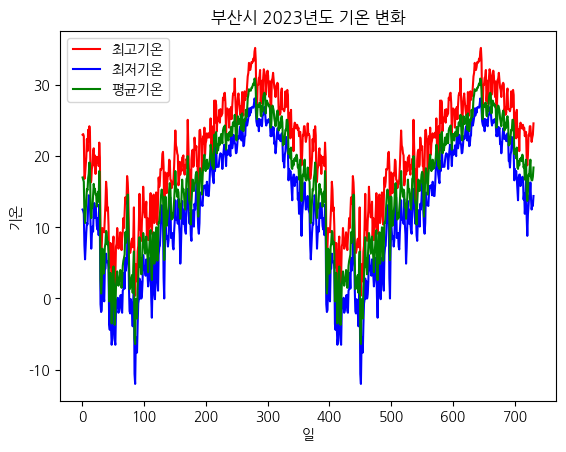

<Figure size 640x480 with 0 Axes>

In [43]:
1# 맷플롯립 관현 라이브러리 가져옥;
import matplotlib.pyplot as plt

4# 글꼴 설정
plt.rc('font', family='NanumGothic')

# 마이너스 기호가 꺠지지 않도록 설정.
plt.rcParams['axes.unicode_minus'] = False

# 그래프의 제목 설정.
plt.title('부산시 2023년도 기온 변화')

# 선그래프 그리지
# x축과 y축 설정
plt.plot(range(1,len(df2)+1), df2['최고기온'], label='최고기온', c='r')
plt.plot(range(1,len(df2)+1), df2['최저기온'], label='최저기온', c='b')
plt.plot(range(1,len(df2)+1), df2['평균기온'], label='평균기온', c='g')

# x축과 y축 라벨 설정
plt.xlabel('일')
plt.ylabel('기온')

# 범례 표시
plt.legend()

# 그래프 화면 표현
plt.show()

# 파일로 저장.
plt.savefig('2023부산기온.png')

#3월 데이터만 추출하기
#####일시는 0bjext 자료형이다.
3월 데이터를 추출할 수 있도록
"연-월-일"의 날짜형 테이터로 변결하자

In [35]:
# 일시 데이터를 날짜형으로 변경
df2['일시'] = pd.to_datetime(df2['일시'], format='%Y-%m-%d')

df2['일시']

0     2022-11-01
1     2022-11-02
2     2022-11-03
3     2022-11-04
4     2022-11-05
         ...    
725   2023-10-27
726   2023-10-28
727   2023-10-29
728   2023-10-30
729   2023-10-31
Name: 일시, Length: 730, dtype: datetime64[ns]

In [41]:
# 일시 열을 인데스로 지정
# 일시열을 각 행에서 교유하면서 순차로 증가하기 떄문에 이열을 인데스로 지정하면 편리하다.

df3 = df2.set_index('일시')

df3.head()

지점 지점명  평균기온  최저기온  최저기온 시각(hhmi)  최고기온  최고기온 시각(hhmi)
일시                                                                 
2022-11-01  159  부산  17.0  12.5          657.0  23.0           1217
2022-11-02  159  부산  16.7  12.3          554.0  23.1           1258
2022-11-03  159  부산  16.4  11.9          654.0  22.8           1348
2022-11-04  159  부산  11.6   7.5         2357.0  16.8           1519
2022-11-05  159  부산  10.6   5.5          537.0  17.4           1447

In [40]:
# 3월 데이터만 추출
df_Mar = df3[pd.DatetimeIndex(df3.index).month == 3]

df_Mar

지점 지점명  평균기온  최저기온  최저기온 시각(hhmi)  최고기온  최고기온 시각(hhmi)
일시                                                                 
2023-03-01  159  부산   9.9   5.6         2358.0  12.2           1524
2023-03-02  159  부산   5.3   2.3          644.0  10.4           1604
2023-03-03  159  부산   7.4   1.1          518.0  14.0           1500
2023-03-04  159  부산  10.7   6.1          722.0  17.0           1248
2023-03-05  159  부산  10.6   7.2          522.0  15.7           1132
...         ...  ..   ...   ...            ...   ...            ...
2023-03-27  159  부산  11.3   7.3          659.0  16.0           1210
2023-03-28  159  부산  12.5   6.9          626.0  16.8           1057
2023-03-29  159  부산  13.7   9.4          629.0  18.6           1218
2023-03-30  159  부산  15.5  10.9          503.0  21.2           1234
2023-03-31  159  부산  17.9  13.8         2355.0  23.6           1131

[62 rows x 7 columns]

ValueError: ignored

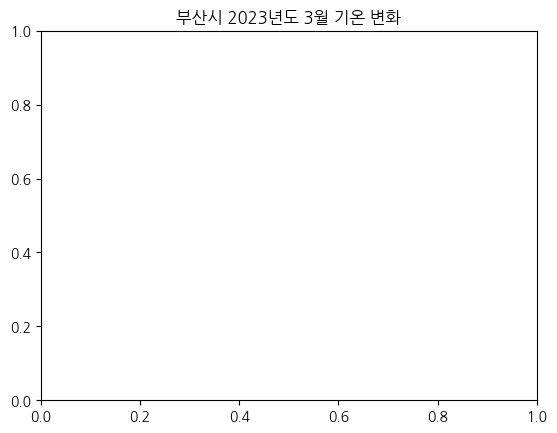

In [46]:
# 3월 기온의 선 그래프 생성.
plt.title('부산시 2023년도 3월 기온 변화')

plt.plot(range(1,32), df_Mar['최고기온'], label = '최고기온', c='r')
plt.plot(range(1,32), df_Mar['평균기온'], label = '평균기온', c='b')
plt.plot(range(1,32), df_Mar['최저기온'], label = '최저기온', c='g')

plt.xlabel('3월')
plt.ylabel('기온')

plt.xlim(1,31)
plt.ylim(-7,22)

plt.legend()

plt.show
plt.savefig('2023부산 기온.png')